## Task 4

#### Import the BBBP dataset from HW5 and calculate morgan fingerprints.

In [9]:
import pandas as pd
import numpy as np

from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
# import BBBP dataset
bbbp = pd.read_csv("BBBP.csv")

In [3]:
# suppress warnings
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

In [4]:
# function: generate canon SMILES
def gen_canon_smiles(smiles_list):
    
    invalid_ids = []
    canon_smiles = []

    for i in range(len(smiles_list)):   
        mol = Chem.MolFromSmiles(smiles_list[i])
        
        # do not append NoneType if invalid
        if mol is None: 
            invalid_ids.append(i)
            continue

        canon_smiles.append(Chem.MolToSmiles(mol))

    return canon_smiles, invalid_ids

# function: calculate morgan fingerprints from SMILES
def calc_morgan_fpts(smiles_list):
    morgan_fingerprints = []
    
    for i in smiles_list:
        mol = Chem.MolFromSmiles(i)
        
        # do not try to calculate if invalid
        if mol is None: continue
            
        fpts = AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
        mfpts = np.array(fpts)
        morgan_fingerprints.append(mfpts) 
        
    return np.array(morgan_fingerprints)

In [7]:
# generate canon smiles
canon_smiles, invalid_ids = gen_canon_smiles(bbbp.smiles)

# drop rows with invalid SMILES
bbbp = bbbp.drop(invalid_ids)

# replace SMILES with canon SMILES
bbbp.smiles = canon_smiles

# drop duplicates to prevent train/valid/test contamination
bbbp.drop_duplicates(subset=['smiles'], inplace=True)

In [10]:
X = calc_morgan_fpts(bbbp.smiles) # features
y = bbbp.p_np # labels

#### Use PCA to reduce the dimensionality of the dataset while preserving 85% of the variance. Then use t-SNE to plot.

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [73]:
# PCA keeping 85% of variance
pca85 = PCA(n_components=0.85)
X_pca85 = pca85.fit_transform(X)

In [74]:
# t-SNE to reduce compressed data to two dimensions
tsne = TSNE(n_components=2, init="random", learning_rate="auto")
X_pca85_tsne = tsne.fit_transform(X_pca85)

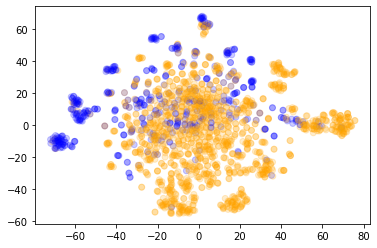

In [75]:
# plot results
colors = ["orange" if x==1 else "blue" for x in y]
plt.scatter(X_pca85_tsne[:,0], X_pca85_tsne[:,1], c=colors, alpha=0.2)
plt.show()

#### Use PCA to reduce the dataset to 2 dimensions and plot.

In [58]:
# PCA to compress into 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

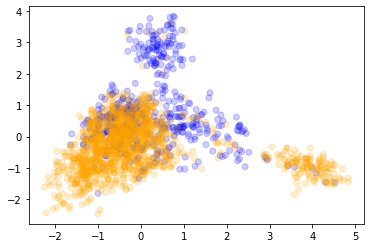

In [65]:
# plot results
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, alpha=0.2)
plt.show()

#### Use PCA to reduce the dimensionality of the dataset while preserving 95% of the variance. Then use t-SNE to plot.

In [67]:
# PCA keeping 95% of variance
pca95 = PCA(n_components=0.95)
X_pca95 = pca95.fit_transform(X)

In [68]:
# t-SNE to reduce compressed data to two dimensions
tsne = TSNE(n_components=2, init="random", learning_rate="auto")
X_pca95_tsne = tsne.fit_transform(X_pca95)

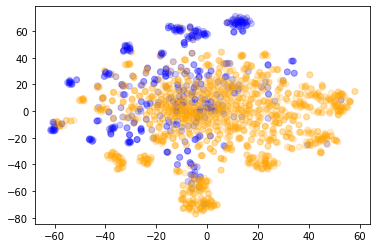

In [69]:
# plot results
plt.scatter(X_pca95_tsne[:,0], X_pca95_tsne[:,1], c=colors, alpha=0.2)
plt.show()

#### Use PCA to reduce the dimensionality of the dataset while preserving 75% of the variance. Then use t-SNE to plot.

In [77]:
# PCA keeping 75% of variance
pca75 = PCA(n_components=0.75)
X_pca75 = pca75.fit_transform(X)

In [78]:
# t-SNE to reduce compressed data to two dimensions
tsne = TSNE(n_components=2, init="random", learning_rate="auto")
X_pca75_tsne = tsne.fit_transform(X_pca75)

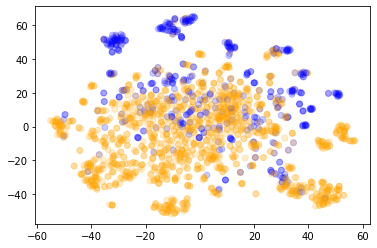

In [79]:
# plot results
plt.scatter(X_pca75_tsne[:,0], X_pca75_tsne[:,1], c=colors, alpha=0.2)
plt.show()

#### Compare the above visualizations.

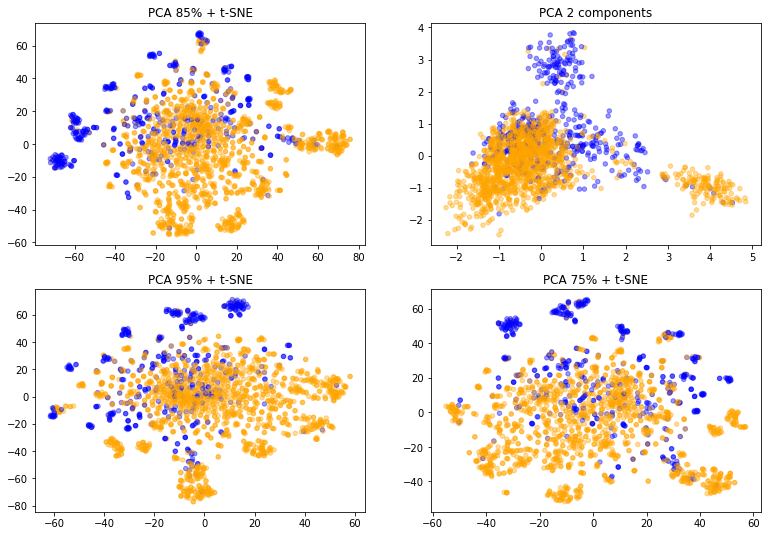

In [101]:
fig, axs = plt.subplots(2, 2, figsize=(13, 9))
axs[0,0].scatter(X_pca85_tsne[:,0], X_pca85_tsne[:,1], c=colors, alpha=0.4, s=20)
axs[0,1].scatter(X_pca[:,0], X_pca[:,1], c=colors, alpha=0.4, s=20)
axs[1,0].scatter(X_pca95_tsne[:,0], X_pca95_tsne[:,1], c=colors, alpha=0.4, s=20)
axs[1,1].scatter(X_pca75_tsne[:,0], X_pca75_tsne[:,1], c=colors, alpha=0.4, s=20)
axs[0,0].set_title("PCA 85% + t-SNE")
axs[0,1].set_title("PCA 2 components")
axs[1,0].set_title("PCA 95% + t-SNE")
axs[1,1].set_title("PCA 75% + t-SNE")
plt.show()

It is immediately clear that the vizualization using only PCA to reduce the dataset down to 2 dimensions looks very different from the visualizations which utilized t-SNE. There is some shape to the data, but it does not make any correlations obvious. It makes sense that the data transformed only with PCA would look different from data transformed with t-SNE since the two transformation algorithms have different learning tasks. 

The t-SNE transformed plots look clearer than the PCA plot. A pattern is discernible, and it is more organized (has more structure) than anything on the PCA plot. The difference between the t-SNE transformed plots is that the higher the variance explained is, the clearer the clusters in the plot become. For 75% variance explained, we can see slight clusters. The clusters are more pronounced for 85% and 95% variance explained. 

85% and 95% variance explained plots look quite similar. It is difficult to say for sure if 85% or 95% variance explained is better than the other without creating models and testing accuracy. For visualization purposes, I would conclude that they are about the same.